#Helper Functions

In [ ]:
# I took this function "https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/02_neural_network_classification_in_tensorflow.ipynb" for create prettified confusion matrix

import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=28):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename);
  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=1);

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [ ]:
def pred_and_plot(model, filenames, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  imgs=[]
  preds=[]
  for i in filenames:
    img = load_and_prep_image(i);
    imgs.append(img)
    # Make a prediction
    #pred = model.predict(tf.expand_dims(img, axis=0))
    # Get the predicted class
    #pred_class = class_names[int(tf.round(pred)[0][0])]
    y_probs = model.predict(tf.reshape(img,(1,28,28,1)))
    pred_class = y_probs.argmax(axis=1)  
    preds.append(pred_class[0])
  # Plot the image and predicted class
  fig, ((ax0, ax1), (ax2, ax3),(ax4,ax5),(ax6,ax7),(ax8,ax9)) = plt.subplots(5,2,figsize=(8, 20));
  ax0.imshow(imgs[0]);
  ax0.set_title(f"Predictions {preds[0]}");
  ax1.imshow(imgs[1]);
  ax1.set_title(f"Predictions {preds[1]}");
  ax2.imshow(imgs[2]);
  ax2.set_title(f"Predictions {preds[2]}");
  ax3.imshow(imgs[3]);
  ax3.set_title(f"Predictions {preds[3]}");
  ax4.imshow(imgs[4]);
  ax4.set_title(f"Predictions {preds[4]}");
  ax5.imshow(imgs[5]);
  ax5.set_title(f"Predictions {preds[5]}");
  ax6.imshow(imgs[6]);
  ax6.set_title(f"Predictions {preds[6]}");
  ax7.imshow(imgs[7]);
  ax7.set_title(f"Predictions {preds[7]}");
  ax8.imshow(imgs[8]);
  ax8.set_title(f"Predictions {preds[8]}");
  ax9.imshow(imgs[9]);
  ax9.set_title(f"Predictions {preds[9]}");

for ax in fig.get_axes():
    ax.label_outer()

In [ ]:
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  """
  Creates a TensorBoard callback instand to store log files.
  Stores log files with the filepath:
    "dir_name/experiment_name/current_datetime/"
  Args:
    dir_name: target directory to store TensorBoard log files
    experiment_name: name of experiment directory (e.g. efficientnet_model_1)
  """
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

In [ ]:
    !wget -q https://www.ikh.fi/images/wwwkuvat/Tuotekuvat/TRIN100-0_S_1_web.jpg
    !wget -q https://www.ikh.fi/images/wwwkuvat/Tuotekuvat/TRIN100-1_S_1_web.jpg
    !wget -q https://www.ikh.fi/images/wwwkuvat/Tuotekuvat/TRIN100-2_S_1_web.jpg           
    !wget -q https://www.ikh.fi/images/wwwkuvat/Tuotekuvat/TRIN100-3_S_1_web.jpg
    !wget -q https://www.ikh.fi/images/wwwkuvat/Tuotekuvat/TRIN100-4_S_1_web.jpg
    !wget -q https://www.ikh.fi/images/wwwkuvat/Tuotekuvat/TRIN100-5_S_1_web.jpg
    !wget -q https://www.ikh.fi/images/wwwkuvat/Tuotekuvat/TRIN100-6_S_1_web.jpg
    !wget -q https://www.ikh.fi/images/wwwkuvat/Tuotekuvat/TRIN100-7_S_1_web.jpg
    !wget -q https://www.ikh.fi/images/wwwkuvat/Tuotekuvat/TRIN100-8_S_1_web.jpg
    !wget -q https://www.ikh.fi/images/wwwkuvat/Tuotekuvat/TRIN100-9_S_1_web.jpg
def game(model):
  """
  In this function, apart from the data set, I wanted to upload 1 sample image for each class and see the prediction of the model and visualize it.

   Args:
      model : take model
  
   Return:
      10 graphs with prediction according to model
  """

  file_name = ["TRIN100-{}_S_1_web.jpg".format(i) for i in range(10)]
  pred_and_plot(model,file_name,[i for i in range(10)]);

In [ ]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

#Load Data

In [1]:
!pip install sh

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from keras.datasets import mnist
from sh import gunzip
from mlxtend.data import loadlocal_mnist

In [3]:
# Download data using link
!wget http://www.dia.fi.upm.es/~lbaumela/PracRF11/train-images-idx3-ubyte.gz
!wget http://www.dia.fi.upm.es/~lbaumela/PracRF11/train-labels-idx1-ubyte.gz
!wget http://www.dia.fi.upm.es/~lbaumela/PracRF11/t10k-images-idx3-ubyte.gz
!wget http://www.dia.fi.upm.es/~lbaumela/PracRF11/t10k-labels-idx1-ubyte.gz

--2023-05-08 21:08:58--  http://www.dia.fi.upm.es/~lbaumela/PracRF11/train-images-idx3-ubyte.gz
Resolving www.dia.fi.upm.es (www.dia.fi.upm.es)... 138.100.11.29
Connecting to www.dia.fi.upm.es (www.dia.fi.upm.es)|138.100.11.29|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9912422 (9.5M) [application/x-gzip]
Saving to: ‘train-images-idx3-ubyte.gz’

train-images-idx3-u 100%[===================>]   9.45M   733KB/s    in 14s     

2023-05-08 21:09:14 (681 KB/s) - ‘train-images-idx3-ubyte.gz’ saved [9912422/9912422]

--2023-05-08 21:09:14--  http://www.dia.fi.upm.es/~lbaumela/PracRF11/train-labels-idx1-ubyte.gz
Resolving www.dia.fi.upm.es (www.dia.fi.upm.es)... 138.100.11.29
Connecting to www.dia.fi.upm.es (www.dia.fi.upm.es)|138.100.11.29|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28881 (28K) [application/x-gzip]
Saving to: ‘train-labels-idx1-ubyte.gz’

train-labels-idx1-u 100%[===================>]  28.20K  --.-KB/s    in 0.1s    



In [4]:
gunzip('train-images-idx3-ubyte.gz')
gunzip('train-labels-idx1-ubyte.gz')
gunzip('t10k-images-idx3-ubyte.gz')
gunzip('t10k-labels-idx1-ubyte.gz')

''

In [5]:
X_train, y_train = loadlocal_mnist(
            images_path='train-images-idx3-ubyte', 
            labels_path='train-labels-idx1-ubyte',
            )
X_test,y_test = loadlocal_mnist(
            images_path='t10k-images-idx3-ubyte', 
            labels_path='t10k-labels-idx1-ubyte',
            )

#Data Preprocessing

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
print((min(X_train[2]), max(X_train[1])))

(0, 255)


In [8]:
X_train.shape,X_test.shape

((60000, 784), (10000, 784))

In [9]:
X_train_df = pd.DataFrame(X_train)
X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X_train_df.isnull().sum().sum()

0

In [11]:
y_train_df = pd.DataFrame(y_train)
y_train_df

,0
0,5
1,0
2,4
3,1
4,9
...,...
59995,8
59996,3
59997,5
59998,6


In [12]:
distribution_train = y_train_df.value_counts()
distribution_train

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
dtype: int64

##Data Visualisation

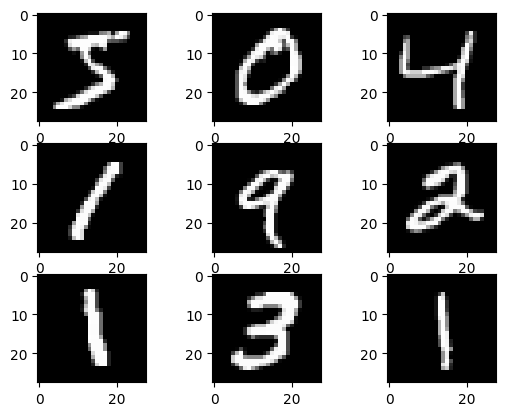

In [ ]:
# plotting the first 9 images in the train set of MNIST
fig, axs = plt.subplots(3, 3)
cnt = 0
for i in range(3):
     for j in range(3):
         axs[i, j].imshow(X_train[cnt].reshape(28,28),cmap="gray")
         cnt += 1

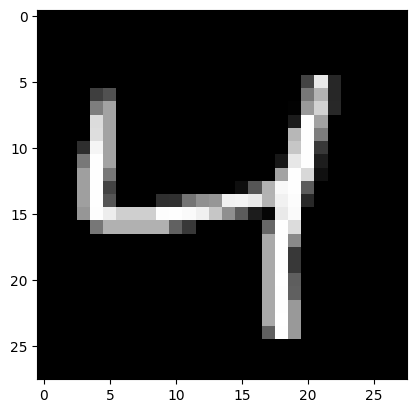

In [ ]:
img = X_train[2].reshape( (28, 28))
plt.imshow(img, cmap='gray')

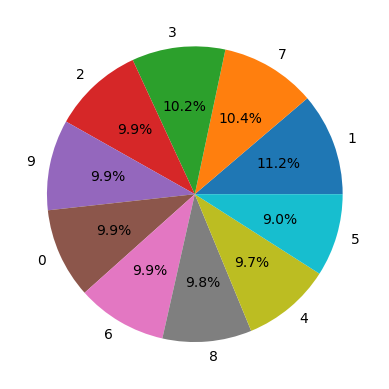

In [ ]:
# visualization of the distribution of the training dataset
plt.pie(distribution_train.values, labels = [ i[0] for i in list(distribution_train.index)],autopct='%1.1f%%')
plt.show() 

When training a machine learning model, it is important to consider the distribution of classes in the training dataset. If the dataset contains an imbalanced number of instances for each class, the model may become biased towards the majority class and perform poorly on the minority classes.Despite slight variations in the class distribution depicted in the pie chart of the Mnist dataset, I contend that these discrepancies are not significant enough to create any substantial biases in the our model.

##Normalize Data

In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator,NumpyArrayIterator


In [14]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [15]:
X_train.shape

(60000, 784)

In [16]:
y_train.shape

(60000,)

In [17]:
y_train = tf.one_hot(y_train,10)
y_test = tf.one_hot(y_test,10)

In [18]:
y_train.shape

TensorShape([60000, 10])

In [19]:
y_train

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)>

##Data_loader 

In [22]:
def data_loader(X, y , batch_size = 32 ):
  """
  args:
    data_loader function take a X , y , batch_size and normalized values in dataset.
    X : train values
    y : test values
    batch_size : the number of training examples used in one iteration during the training process of a neural network. 
    normalize : convert data between 0 - 1 values if this value True . Default is this values True.

  return:
    Returns the data it receives divided into batches
  """
  return  NumpyArrayIterator(tf.reshape(X,(len(X),28,28,1)) , y , batch_size= batch_size , image_data_generator = train_datagen)

 

In [23]:
train_data_ = data_loader(X_train,y_train)
test_data_ = data_loader(X_test,y_test)

In [25]:
train_data_.next()[1].shape

(32, 10)

In [26]:
train_data_.next()[0].shape

(32, 28, 28, 1)

#Create CNN Model

In [ ]:
#Import modules
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
from sklearn.metrics import classification_report
import numpy as np

##Baseline Model

In [ ]:
tf.random.set_seed(47)

model = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(28, 28, 1)), 
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

# Compile the model
model.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history = model.fit(train_data_,
                        epochs=20,
                        steps_per_epoch=len(train_data_),
                         validation_data=test_data_,
                        validation_steps=0.25*len(test_data_),
                        callbacks = [create_tensorboard_callback(dir_name="ass2_callback", # save experiment logs here
                                                                 experiment_name="Baseline Model")])

Saving TensorBoard log files to: ass2_callback/Baseline Model/20230505-180822
Epoch 1/20
1875/1875 [==============================] - 15s 7ms/step - loss: 0.2560 - accuracy: 0.9230 - val_loss: 0.1195 - val_accuracy: 0.9604
Epoch 2/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0885 - accuracy: 0.9732 - val_loss: 0.0897 - val_accuracy: 0.9703
Epoch 3/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0679 - accuracy: 0.9793 - val_loss: 0.0739 - val_accuracy: 0.9775
Epoch 4/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0564 - accuracy: 0.9824 - val_loss: 0.0703 - val_accuracy: 0.9759
Epoch 5/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0495 - accuracy: 0.9847 - val_loss: 0.0688 - val_accuracy: 0.9790
Epoch 6/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0437 - accuracy: 0.9862 - val_loss: 0.0639 - val_accuracy: 0.9802
Epoch 7/20
1875/1875 [==============================

In [ ]:
model.evaluate(test_data_)

313/313 [==============================] - 2s 5ms/step - loss: 0.0376 - accuracy: 0.9895


[0.03763940557837486, 0.9894999861717224]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 10)        100       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 10)        910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 10)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 10)        910       
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 10)          910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 10)         0         
 2D)                                                    

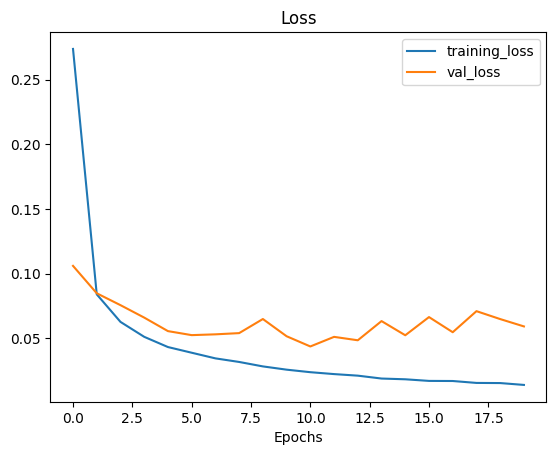

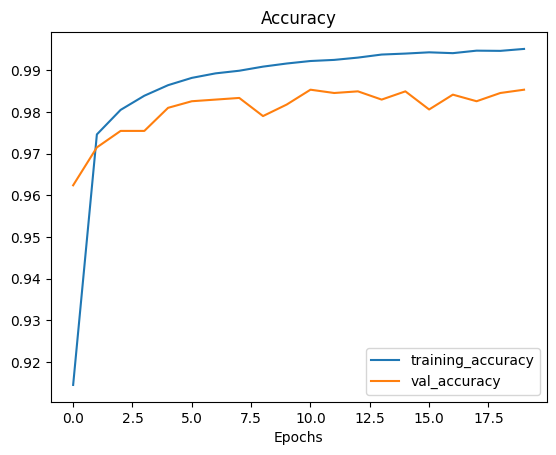

In [ ]:
plot_loss_curves(history)

When we look at the graphs above, we see that our model is overfit after about the 8th epoch. In other words, we can say that while the model learns in the first 8 epochs, it memorizes the train dataset in the remaining 12 epochs. To solve this, we can make the epoch number 8, we can enlarge the data set with data augmentation, we can use a simpler model.

In [ ]:
y_probs = model.predict(test_data_)


313/313 [==============================] - 1s 4ms/step


In [ ]:
y_preds = y_probs.argmax(axis=1)

In [ ]:
y_test_argmax = tf.math.argmax(y_test,axis=1)

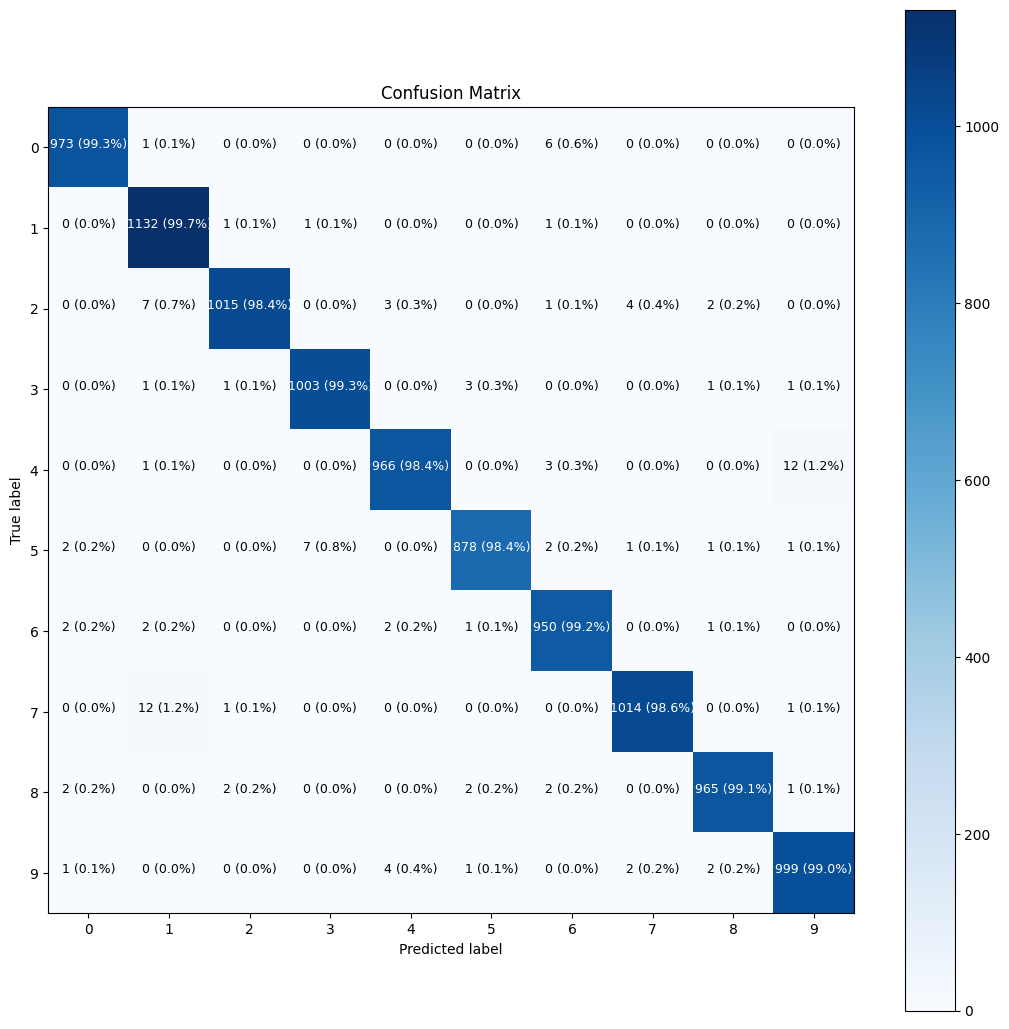

In [ ]:
make_confusion_matrix(y_true=y_test_argmax, 
                      y_pred=y_preds,
                      classes=[i for i in range(10)],
                      figsize=(13, 13),
                      text_size=9)

In [ ]:
print(classification_report(y_test_argmax, y_preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.98      1.00      0.99      1135
           2       1.00      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.98      0.99       892
           6       0.98      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



###Game Part

In this section, apart from the data set, I wanted to upload 1 sample image for each class and see the prediction of the model.

1/1 [==============================] - 0s 54ms/step


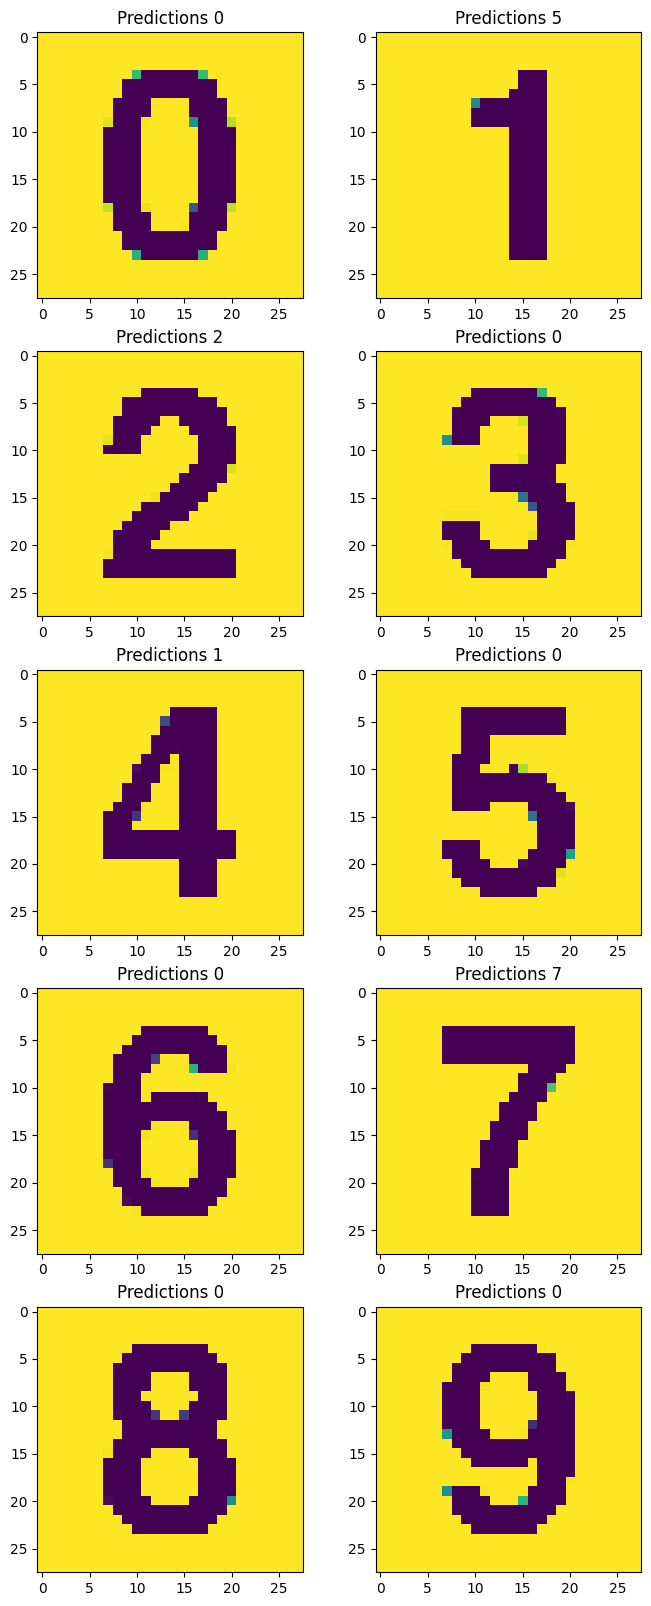

In [ ]:
game(model)

## Model_2 (epoch = 8)

In [ ]:
tf.random.set_seed(47)

model_2 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(28, 28, 1)), 
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

# Compile the model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_2 = model_2.fit(train_data_,
                        epochs=8,
                        steps_per_epoch=len(train_data_),
                         validation_data=test_data_,
                        validation_steps=0.25*len(test_data_),
                        callbacks = [create_tensorboard_callback(dir_name="ass2_callback", # save experiment logs here
                                                                 experiment_name="Model_2")])

Saving TensorBoard log files to: ass2_callback/Model_2/20230505-181400
Epoch 1/8
1875/1875 [==============================] - 16s 7ms/step - loss: 0.2479 - accuracy: 0.9226 - val_loss: 0.1292 - val_accuracy: 0.9577
Epoch 2/8
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0872 - accuracy: 0.9741 - val_loss: 0.0924 - val_accuracy: 0.9691
Epoch 3/8
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0656 - accuracy: 0.9797 - val_loss: 0.0734 - val_accuracy: 0.9759
Epoch 4/8
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0534 - accuracy: 0.9835 - val_loss: 0.0649 - val_accuracy: 0.9790
Epoch 5/8
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0466 - accuracy: 0.9854 - val_loss: 0.0578 - val_accuracy: 0.9786
Epoch 6/8
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0411 - accuracy: 0.9871 - val_loss: 0.0519 - val_accuracy: 0.9810
Epoch 7/8
1875/1875 [==============================] - 13s 7ms/st

In [ ]:
model_2.evaluate(test_data_)

313/313 [==============================] - 1s 4ms/step - loss: 0.0471 - accuracy: 0.9856


[0.04708009213209152, 0.9855999946594238]

In [ ]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 10)        100       
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 12, 12, 10)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 10)        910       
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 10)          910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 10)         0         
 2D)                                                  

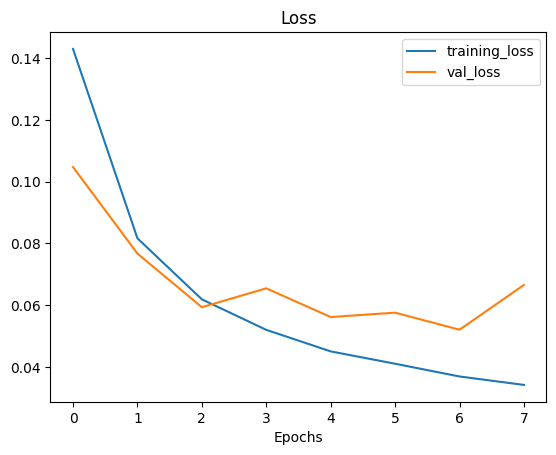

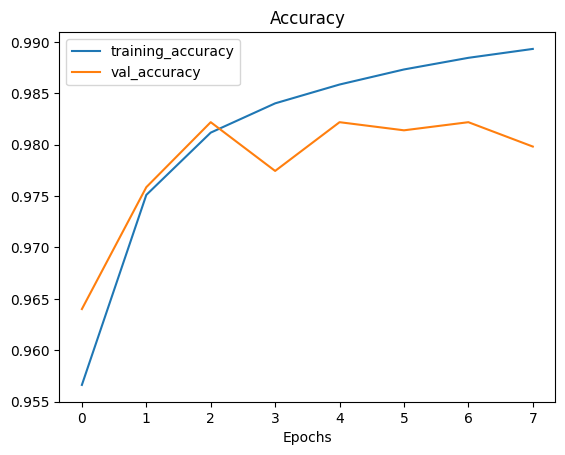

In [ ]:
plot_loss_curves(history_2)

In [ ]:
y_probs_2 = model_2.predict(test_data_)

313/313 [==============================] - 1s 4ms/step


In [ ]:
y_preds_2 = y_probs_2.argmax(axis=1)

In [ ]:
y_test_argmax_2 = tf.math.argmax(y_test,axis=1)

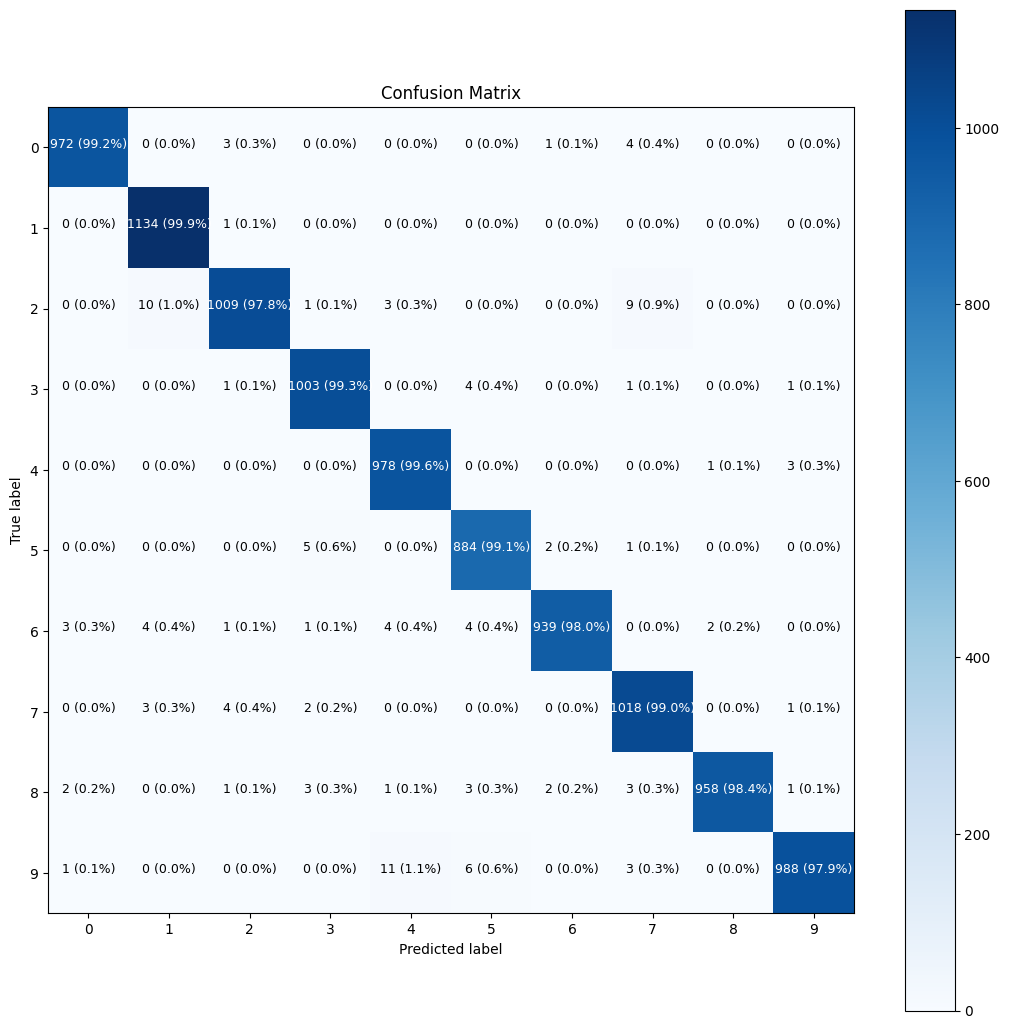

In [ ]:
make_confusion_matrix(y_true=y_test_argmax_2, 
                      y_pred=y_preds,
                      classes=[i for i in range(10)],
                      figsize=(13, 13),
                      text_size=9)

In [ ]:
print(classification_report(y_test_argmax_2, y_preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



###Game Part

1/1 [==============================] - 0s 29ms/step


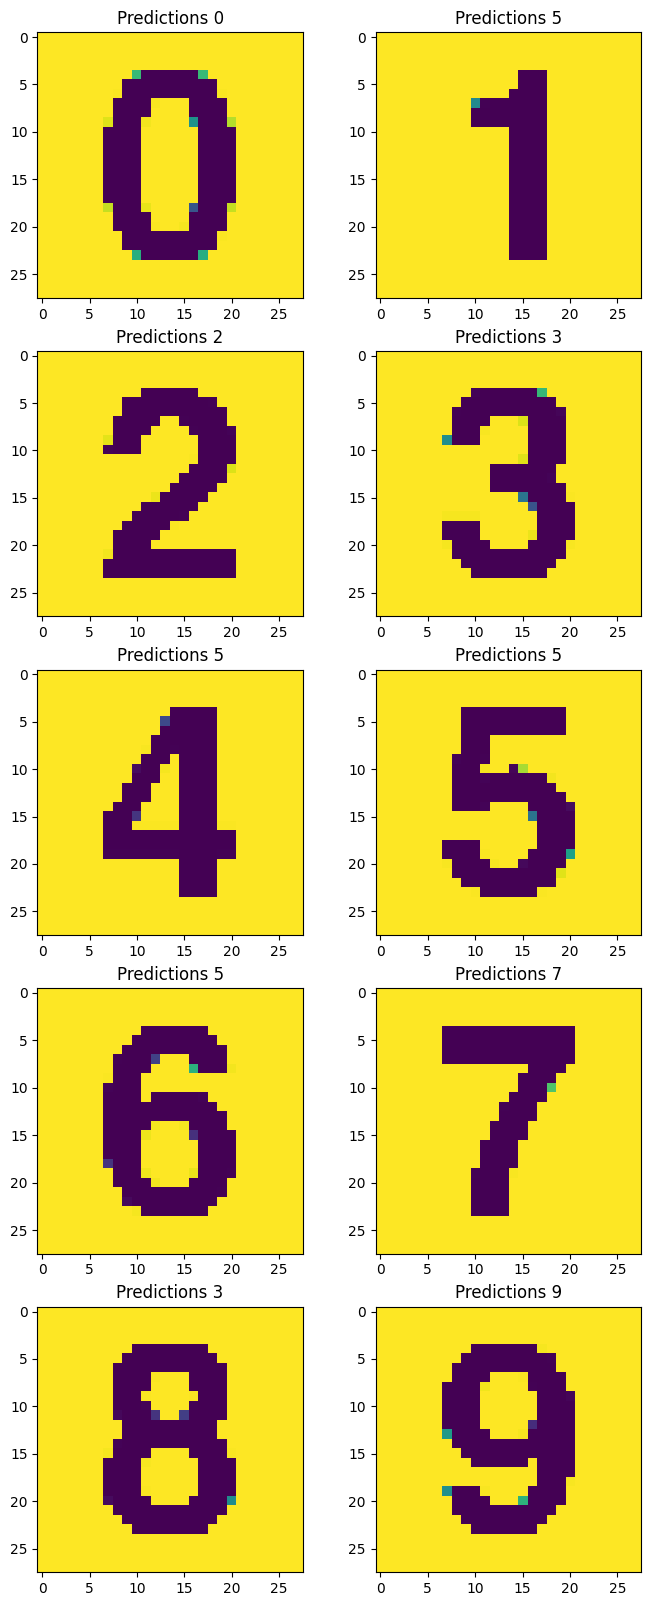

In [ ]:
game(model_2)

##Model_3 (Batch = 64)

In [ ]:
# Load data in from directories and turn it into batches
train_data_ = train_datagen.flow(X_train.reshape(60000,28,28,1),
                                y_train,
                                batch_size=64,
                                seed = 1,
                                shuffle = True,
                                )
test_data_ = test_datagen.flow( X_test.reshape(10000,28,28,1),
                                y_test,
                                batch_size=64,
                                seed = 1,
                                shuffle = False,
                                )

In [ ]:
train_data_[0][0].shape,test_data_[0][0].shape

((64, 28, 28, 1), (64, 28, 28, 1))

In [ ]:
tf.random.set_seed(47)

model_3 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(28, 28, 1)), 
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

# Compile the model
model_3.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_3 = model_3.fit(train_data_,
                        epochs=8,
                        steps_per_epoch=len(train_data_),
                         validation_data=test_data_,
                        validation_steps=0.25*len(test_data_),
                        callbacks = [create_tensorboard_callback(dir_name="ass2_callback", # save experiment logs here
                                                                 experiment_name="Model_3")])

Saving TensorBoard log files to: ass2_callback/Model_3/20230505-180048
Epoch 1/8
938/938 [==============================] - 9s 10ms/step - loss: 0.0190 - accuracy: 0.9939 - val_loss: 0.0515 - val_accuracy: 0.9832
Epoch 2/8
938/938 [==============================] - 8s 8ms/step - loss: 0.0183 - accuracy: 0.9944 - val_loss: 0.0591 - val_accuracy: 0.9805
Epoch 3/8
938/938 [==============================] - 8s 9ms/step - loss: 0.0180 - accuracy: 0.9939 - val_loss: 0.0568 - val_accuracy: 0.9840
Epoch 4/8
938/938 [==============================] - 8s 8ms/step - loss: 0.0180 - accuracy: 0.9940 - val_loss: 0.0546 - val_accuracy: 0.9836
Epoch 5/8
938/938 [==============================] - 9s 10ms/step - loss: 0.0166 - accuracy: 0.9945 - val_loss: 0.0593 - val_accuracy: 0.9812
Epoch 6/8
938/938 [==============================] - 7s 7ms/step - loss: 0.0152 - accuracy: 0.9954 - val_loss: 0.0625 - val_accuracy: 0.9824
Epoch 7/8
938/938 [==============================] - 8s 9ms/step - loss: 0.0145 -

In [ ]:
model_3.evaluate(test_data_)

157/157 [==============================] - 1s 6ms/step - loss: 0.0351 - accuracy: 0.9900


[0.035132795572280884, 0.9900000095367432]

In [ ]:
model_3.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 26, 26, 10)        100       
                                                                 
 conv2d_33 (Conv2D)          (None, 24, 24, 10)        910       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 12, 12, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_34 (Conv2D)          (None, 10, 10, 10)        910       
                                                                 
 conv2d_35 (Conv2D)          (None, 8, 8, 10)          910       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 4, 4, 10)         0         
 g2D)                                                

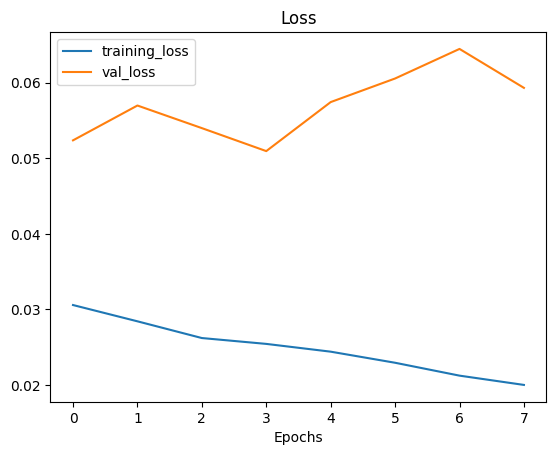

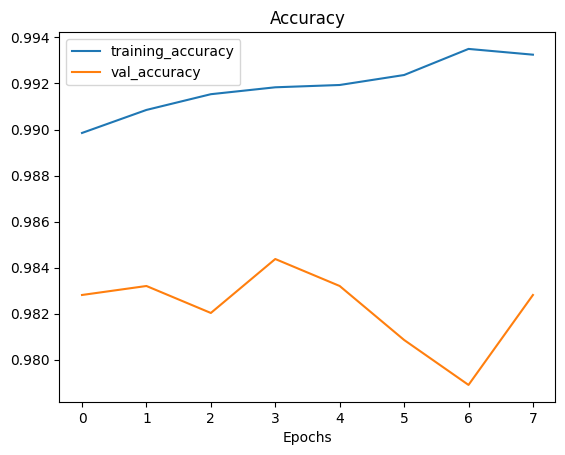

In [ ]:
plot_loss_curves(history_3)

As seen in the graph, the val loss value for the batch size 64 value is quite high compared to the train loss value. We can say that the model for Batch 32 gave better results.

In [ ]:
y_probs_3 = model_3.predict(test_data_)

157/157 [==============================] - 1s 4ms/step


In [ ]:
y_preds_3 = y_probs_3.argmax(axis=1)

In [ ]:
y_test_argmax_3 = tf.math.argmax(y_test,axis=1)

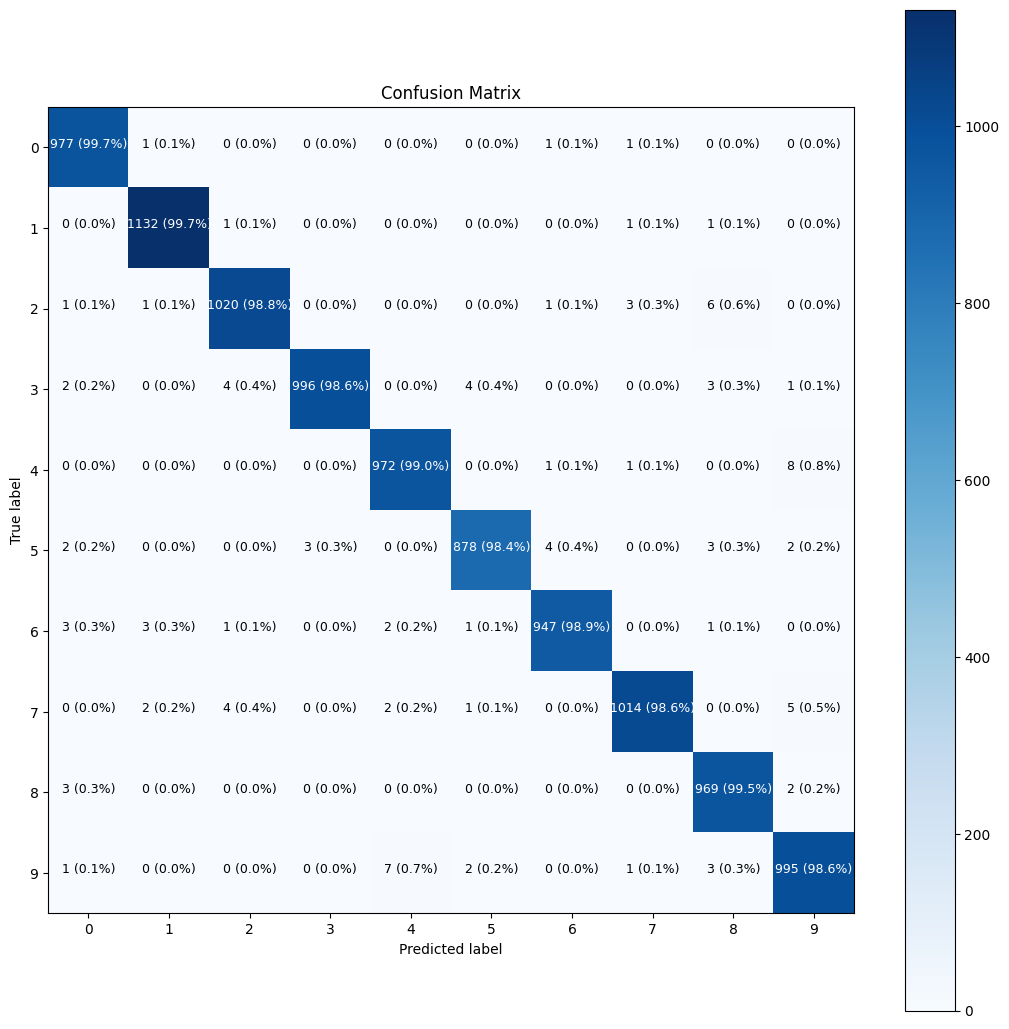

In [ ]:
make_confusion_matrix(y_true=y_test_argmax_3, 
                      y_pred=y_preds_3,
                      classes=[i for i in range(10)],
                      figsize=(13, 13),
                      text_size=9)

In [ ]:
print(classification_report(y_test_argmax_3, y_preds_3))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



###Game Part

1/1 [==============================] - 0s 68ms/step


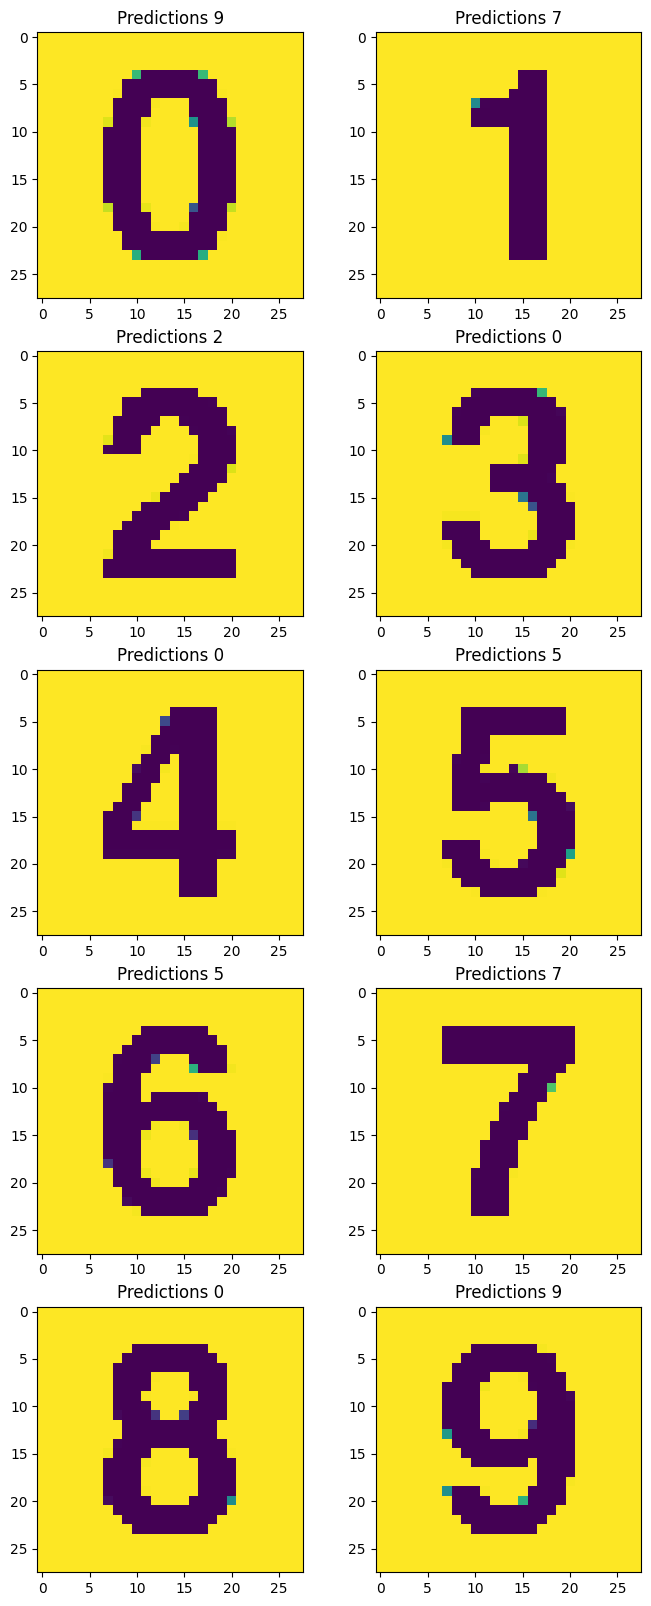

In [ ]:
game(model_3)

## Model_4 (lr=0.01)

In [ ]:
tf.random.set_seed(47)

model_4 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(28, 28, 1)), 
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

# Compile the model
model_4.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_4 = model_4.fit(train_data_,
                        epochs=8,
                        steps_per_epoch=len(train_data_),
                         validation_data=test_data_,
                        validation_steps=0.25*len(test_data_),
                        callbacks = [create_tensorboard_callback(dir_name="ass2_callback", # save experiment logs here
                                                                 experiment_name="Model_4")])

Saving TensorBoard log files to: ass2_callback/Model_4/20230505-181601
Epoch 1/8
1875/1875 [==============================] - 16s 7ms/step - loss: 0.2678 - accuracy: 0.9165 - val_loss: 0.1235 - val_accuracy: 0.9620
Epoch 2/8
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0974 - accuracy: 0.9701 - val_loss: 0.0860 - val_accuracy: 0.9715
Epoch 3/8
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0757 - accuracy: 0.9771 - val_loss: 0.0790 - val_accuracy: 0.9715
Epoch 4/8
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0628 - accuracy: 0.9806 - val_loss: 0.0683 - val_accuracy: 0.9767
Epoch 5/8
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0550 - accuracy: 0.9826 - val_loss: 0.0792 - val_accuracy: 0.9743
Epoch 6/8
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0485 - accuracy: 0.9847 - val_loss: 0.0737 - val_accuracy: 0.9759
Epoch 7/8
1875/1875 [==============================] - 13s 7ms/st

In [ ]:
model_4.evaluate(test_data_)

313/313 [==============================] - 1s 4ms/step - loss: 0.0347 - accuracy: 0.9894


[0.034666188061237335, 0.9894000291824341]

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 10)        100       
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 10)        910       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 12, 12, 10)       0         
 2D)                                                             
                                                                 
 conv2d_14 (Conv2D)          (None, 10, 10, 10)        910       
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 10)          910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 10)         0         
 2D)                                                  

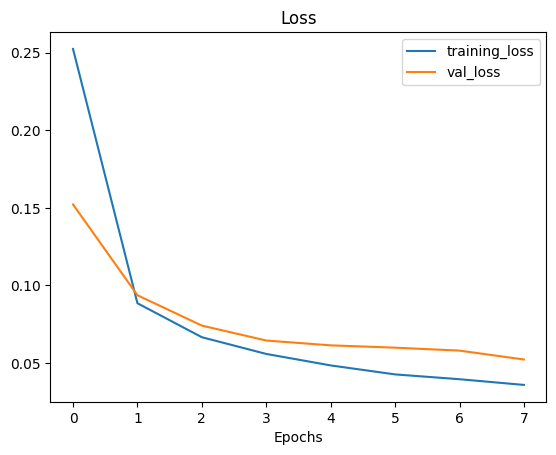

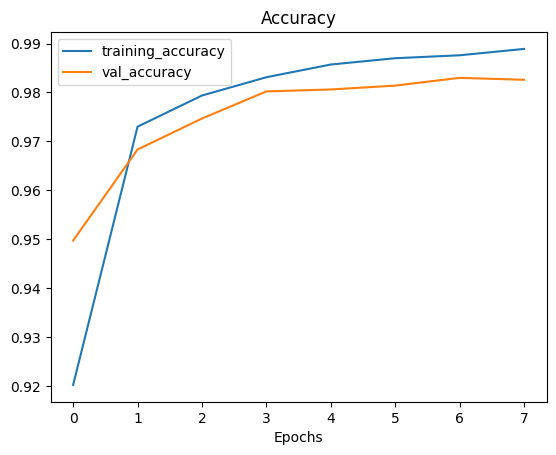

In [ ]:
plot_loss_curves(history_4)

We can see from the accuracy score and graph that the lr rate value of 0.001 or 0.01 does not affect the success of the model much.

In [ ]:
y_probs_4 = model_4.predict(test_data_)


313/313 [==============================] - 1s 4ms/step


In [ ]:
y_preds_4 = y_probs_4.argmax(axis=1)

In [ ]:
y_test_argmax_4 = tf.math.argmax(y_test,axis=1)

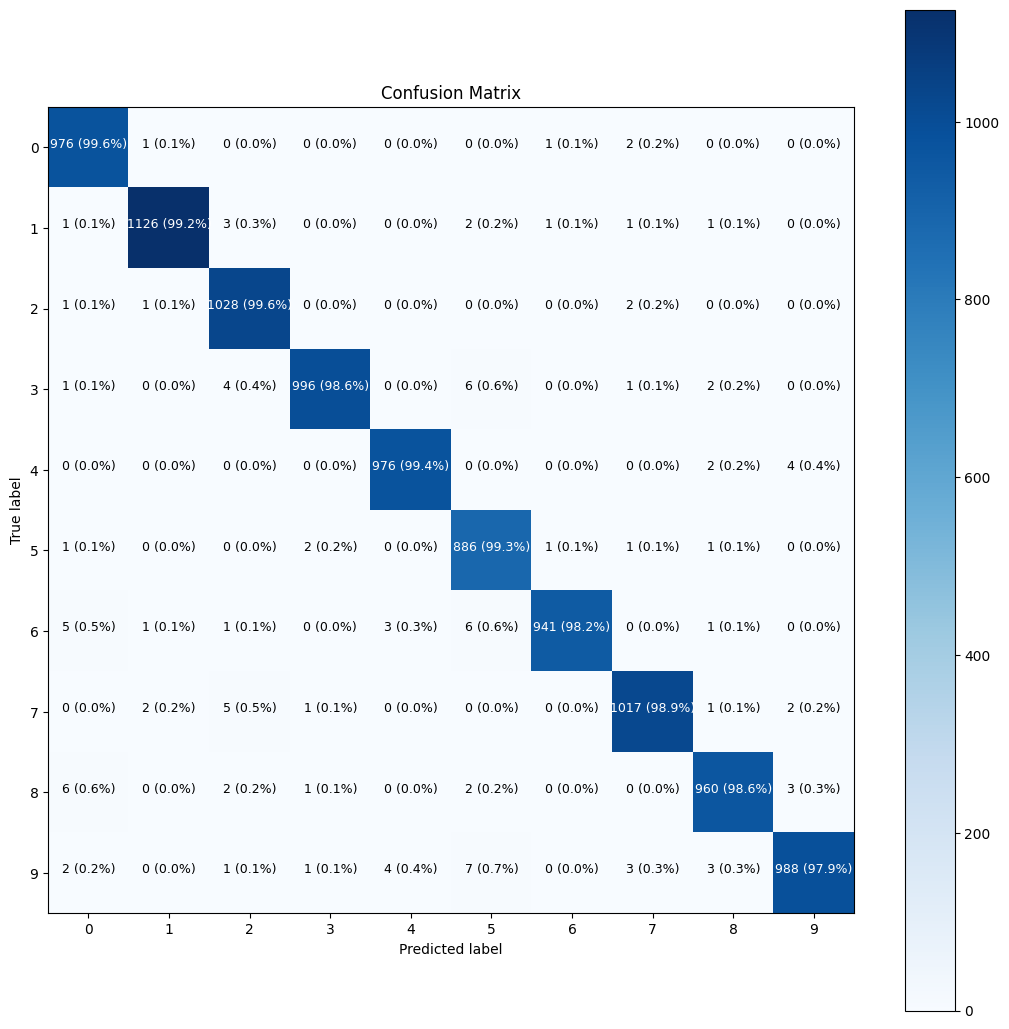

In [ ]:
make_confusion_matrix(y_true=y_test_argmax_4, 
                      y_pred=y_preds_4,
                      classes=[i for i in range(10)],
                      figsize=(13, 13),
                      text_size=9)

In [ ]:
print(classification_report(y_test_argmax, y_preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



###Game Part

1/1 [==============================] - 0s 17ms/step


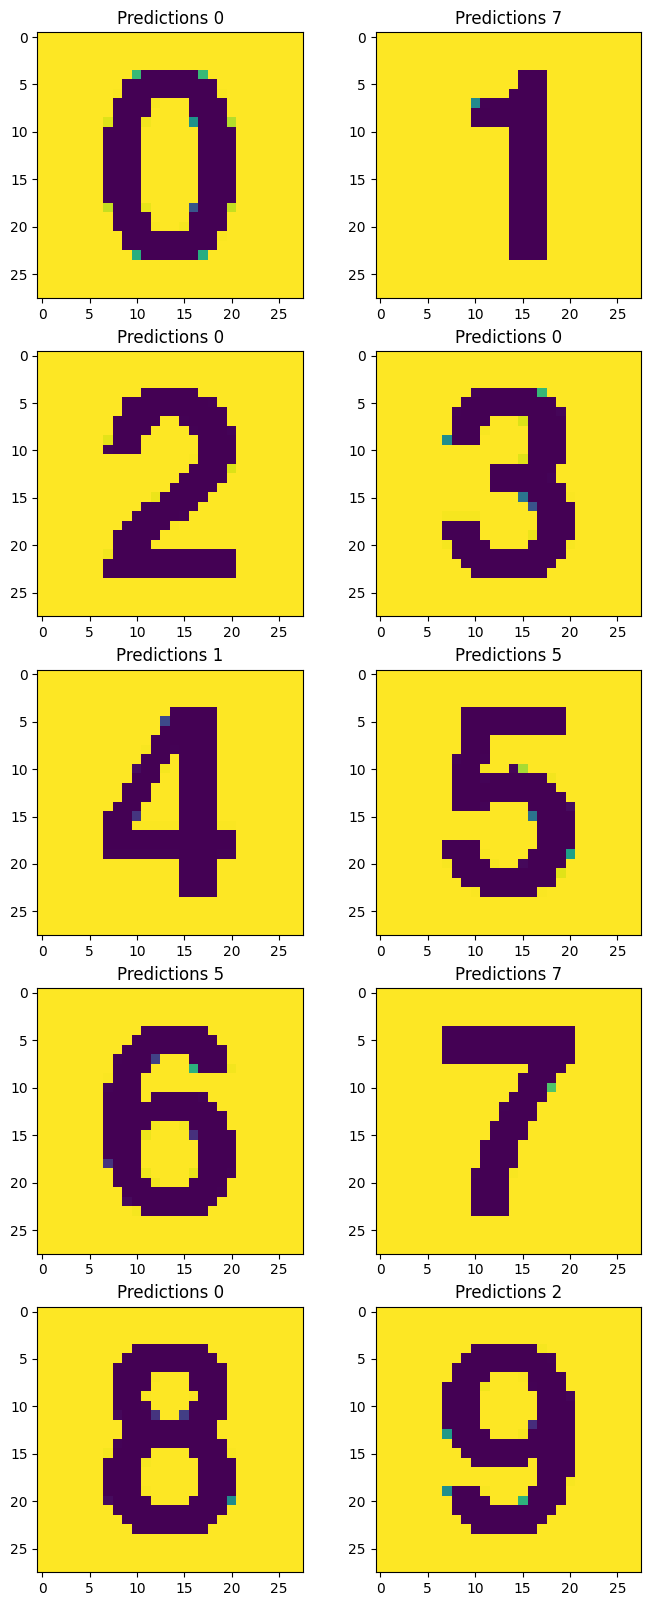

In [ ]:
game(model_4)

##Model_5 (Change Activation Function)

In [ ]:
tf.random.set_seed(47)

model_5 = Sequential([
  Conv2D(10, 3, activation='sigmoid', input_shape=(28, 28, 1)), 
  Conv2D(10, 3, activation='sigmoid'),
  MaxPool2D(),
  Conv2D(10, 3, activation='sigmoid'),
  Conv2D(10, 3, activation='sigmoid'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

# Compile the model
model_5.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data_,
                        epochs=8,
                        steps_per_epoch=len(train_data_),
                         validation_data=test_data_,
                        validation_steps=0.25*len(test_data_),
                        callbacks = [create_tensorboard_callback(dir_name="ass2_callback", # save experiment logs here
                                                                 experiment_name="Model_5")])

Saving TensorBoard log files to: ass2_callback/Model_5/20230505-181812
Epoch 1/8
1875/1875 [==============================] - 17s 8ms/step - loss: 0.8727 - accuracy: 0.7262 - val_loss: 0.3436 - val_accuracy: 0.8983
Epoch 2/8
1875/1875 [==============================] - 20s 10ms/step - loss: 0.2345 - accuracy: 0.9330 - val_loss: 0.2164 - val_accuracy: 0.9391
Epoch 3/8
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1573 - accuracy: 0.9549 - val_loss: 0.1806 - val_accuracy: 0.9454
Epoch 4/8
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1208 - accuracy: 0.9644 - val_loss: 0.1332 - val_accuracy: 0.9581
Epoch 5/8
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1004 - accuracy: 0.9704 - val_loss: 0.1142 - val_accuracy: 0.9636
Epoch 6/8
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0874 - accuracy: 0.9740 - val_loss: 0.1055 - val_accuracy: 0.9644
Epoch 7/8
1875/1875 [==============================] - 14s 7ms/s

In [ ]:
model_5.evaluate(test_data_)

313/313 [==============================] - 1s 5ms/step - loss: 0.0431 - accuracy: 0.9868


[0.043121274560689926, 0.9868000149726868]

In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 10)        100       
                                                                 
 conv2d_17 (Conv2D)          (None, 24, 24, 10)        910       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 10)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 10, 10, 10)        910       
                                                                 
 conv2d_19 (Conv2D)          (None, 8, 8, 10)          910       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 4, 4, 10)         0         
 2D)                                                  

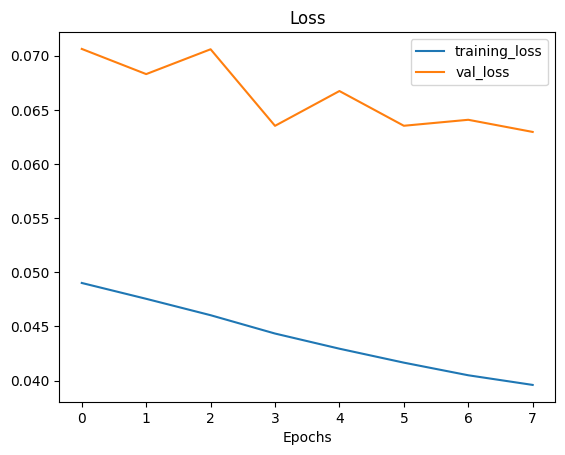

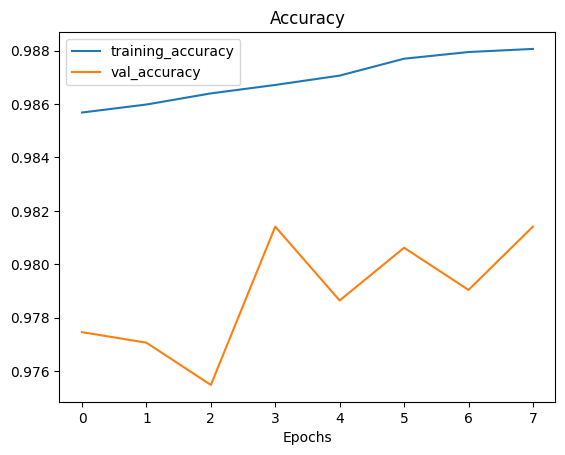

In [ ]:
plot_loss_curves(history_5)

Using the sigmoid activation function instead of relu seems to slow down the converge process of the model and the success of the model seems to be lower than the baseline model. It is theoretically known that Relu optimizes faster.

In [ ]:
y_probs_5 = model_5.predict(test_data_)

313/313 [==============================] - 1s 4ms/step


In [ ]:
y_preds_5 = y_probs_5.argmax(axis=1)

In [ ]:
y_test_argmax_5 = tf.math.argmax(y_test,axis=1)

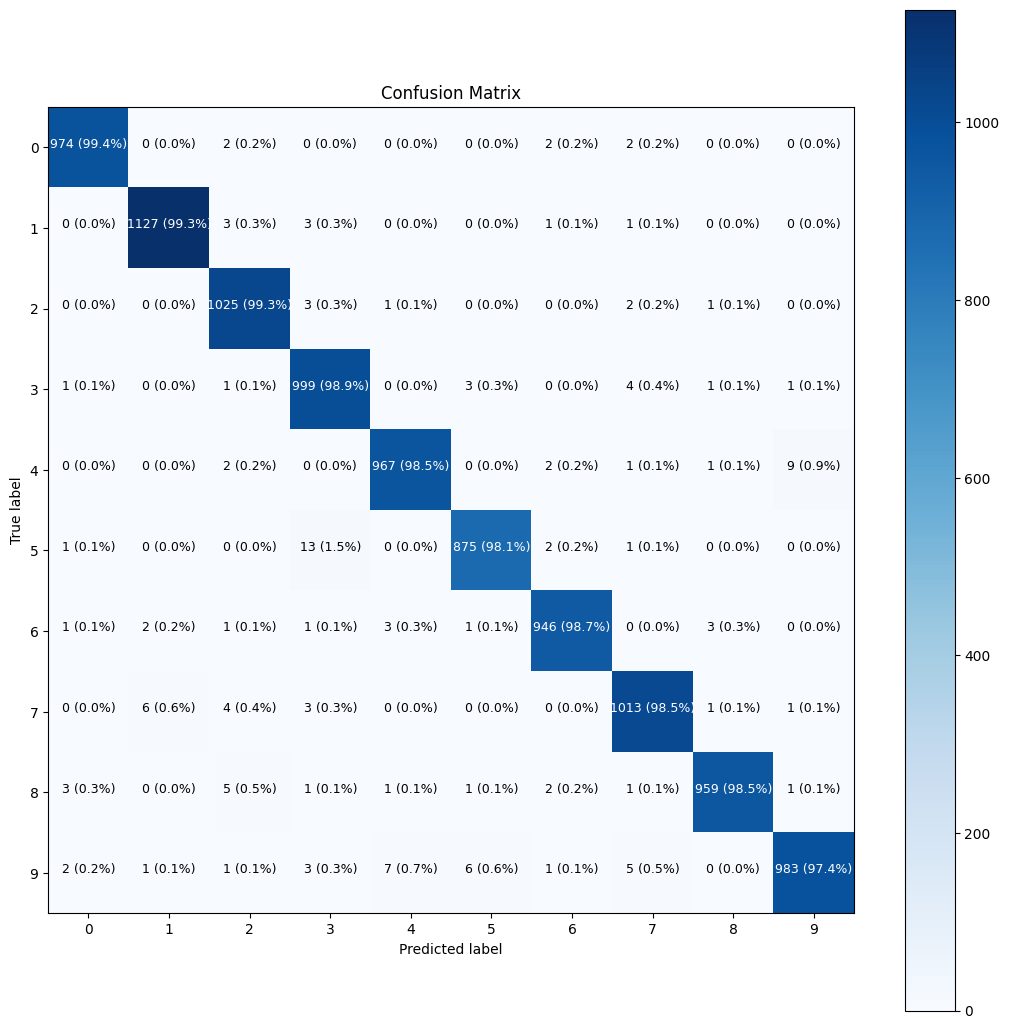

In [ ]:
make_confusion_matrix(y_true=y_test_argmax_5, 
                      y_pred=y_preds_5,
                      classes=[i for i in range(10)],
                      figsize=(13, 13),
                      text_size=9)

In [ ]:
print(classification_report(y_test_argmax, y_preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       1.00      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



###Game Part

1/1 [==============================] - 0s 19ms/step


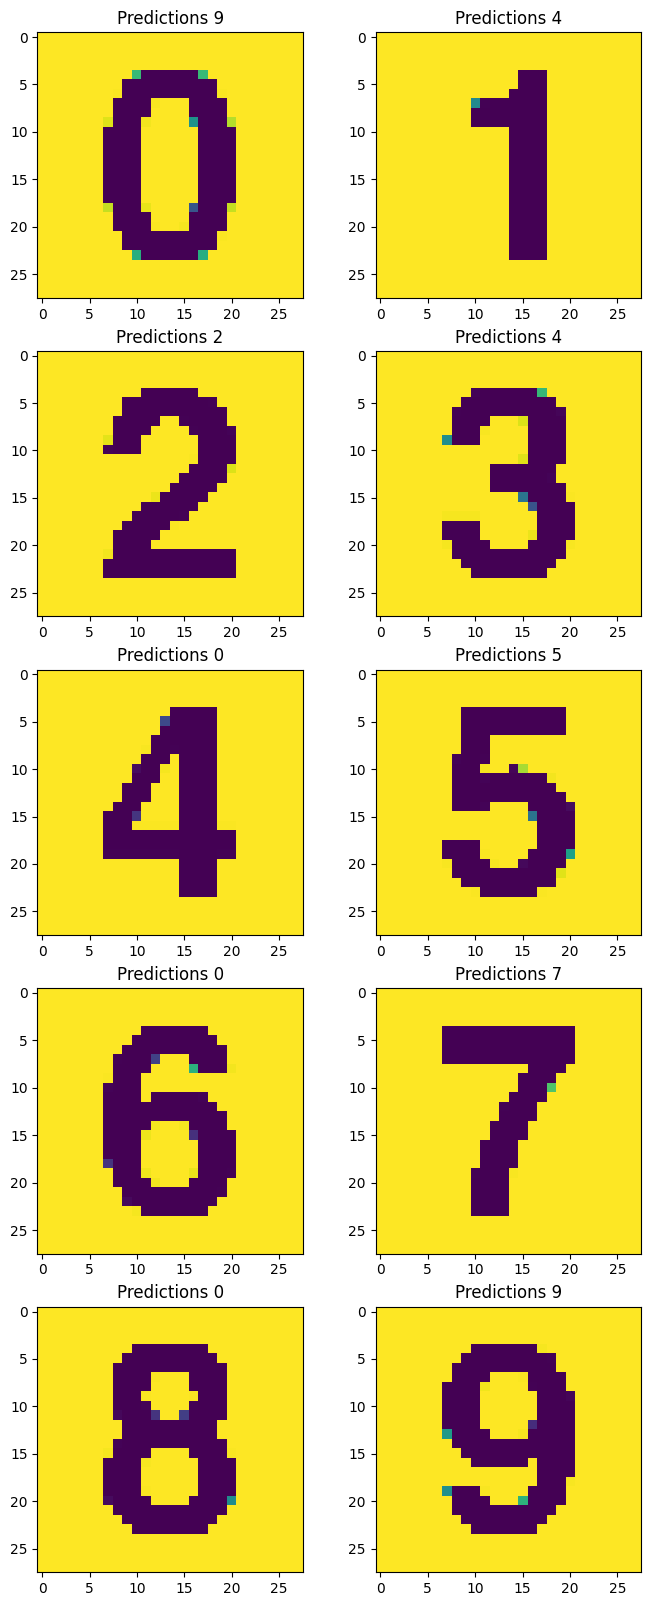

In [ ]:
game(model_5)

##Model_6 (Change Stride)

In [ ]:
tf.random.set_seed(47)

model_6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(28, 28, 1),strides=(1,1),padding = "same"), 
  Conv2D(10, 3, activation='relu',strides = (2,2),padding='same'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu',strides = (2,2),padding='same'),
  Conv2D(10, 3, activation='relu',strides = (2,2),padding='same'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

# Compile the model
model_6.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_6 = model_6.fit(train_data_,
                        epochs=8,
                        steps_per_epoch=len(train_data_),
                         validation_data=test_data_,
                        validation_steps=0.25*len(test_data_),
                        callbacks = [create_tensorboard_callback(dir_name="ass2_callback", # save experiment logs here
                                                                 experiment_name="Model_6")])

Saving TensorBoard log files to: ass2_callback/Model_6/20230505-182024
Epoch 1/8
1875/1875 [==============================] - 17s 7ms/step - loss: 0.4663 - accuracy: 0.8544 - val_loss: 0.2204 - val_accuracy: 0.9288
Epoch 2/8
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1524 - accuracy: 0.9535 - val_loss: 0.1610 - val_accuracy: 0.9486
Epoch 3/8
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1173 - accuracy: 0.9642 - val_loss: 0.1291 - val_accuracy: 0.9545
Epoch 4/8
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0993 - accuracy: 0.9699 - val_loss: 0.1413 - val_accuracy: 0.9541
Epoch 5/8
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0889 - accuracy: 0.9728 - val_loss: 0.1095 - val_accuracy: 0.9628
Epoch 6/8
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0802 - accuracy: 0.9757 - val_loss: 0.1027 - val_accuracy: 0.9652
Epoch 7/8
1875/1875 [==============================] - 13s 7ms/st

In [ ]:
model_6.evaluate(test_data_)

313/313 [==============================] - 1s 5ms/step - loss: 0.0755 - accuracy: 0.9756


[0.07546728849411011, 0.975600004196167]

In [ ]:
model_6.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 10)        100       
                                                                 
 conv2d_19 (Conv2D)          (None, 14, 14, 10)        910       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 7, 7, 10)         0         
 2D)                                                             
                                                                 
 conv2d_20 (Conv2D)          (None, 4, 4, 10)          910       
                                                                 
 conv2d_21 (Conv2D)          (None, 2, 2, 10)          910       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 1, 1, 10)         0         
 2D)                                                  

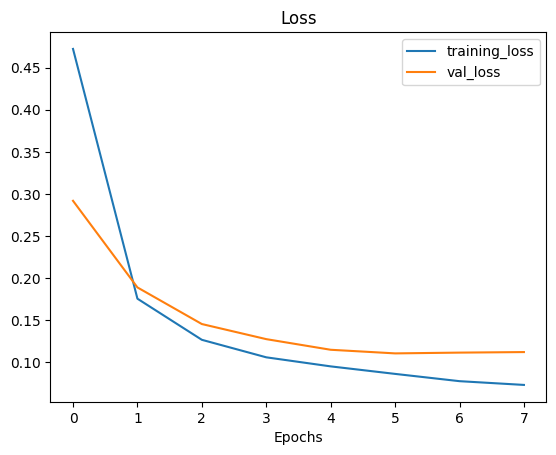

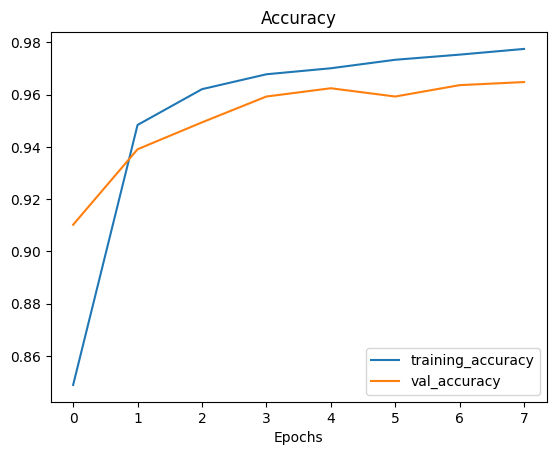

In [ ]:
plot_loss_curves(history_6)

The fact that the stride value is 2 instead of 1 seems to reduce the success of the model a bit.

In [ ]:
y_probs_6 = model_6.predict(test_data_)


313/313 [==============================] - 1s 4ms/step


In [ ]:
y_preds_6 = y_probs_6.argmax(axis=1)

In [ ]:
y_test_argmax_6 = tf.math.argmax(y_test,axis=1)

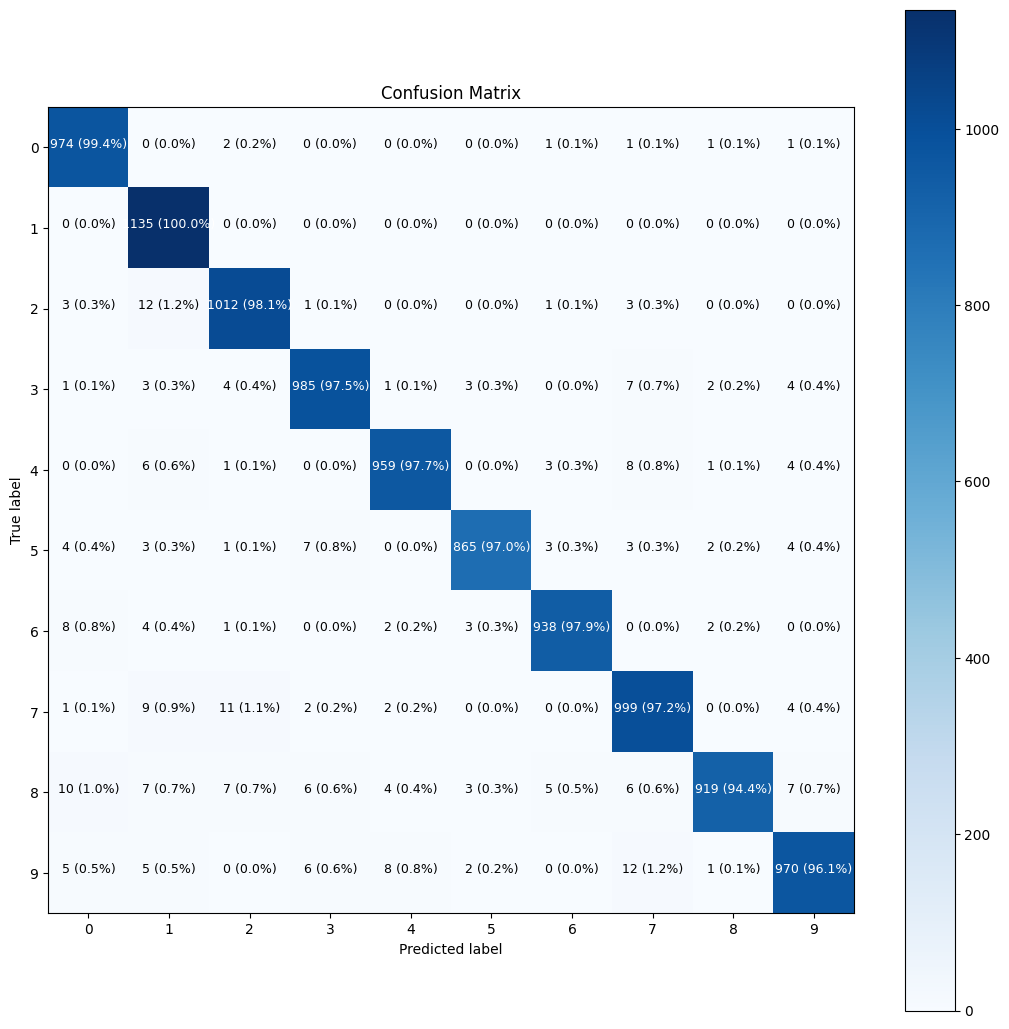

In [ ]:
make_confusion_matrix(y_true=y_test_argmax_6, 
                      y_pred=y_preds_6,
                      classes=[i for i in range(10)],
                      figsize=(13, 13),
                      text_size=9)

In [ ]:
print(classification_report(y_test_argmax, y_preds))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



###Game Part

1/1 [==============================] - 0s 30ms/step


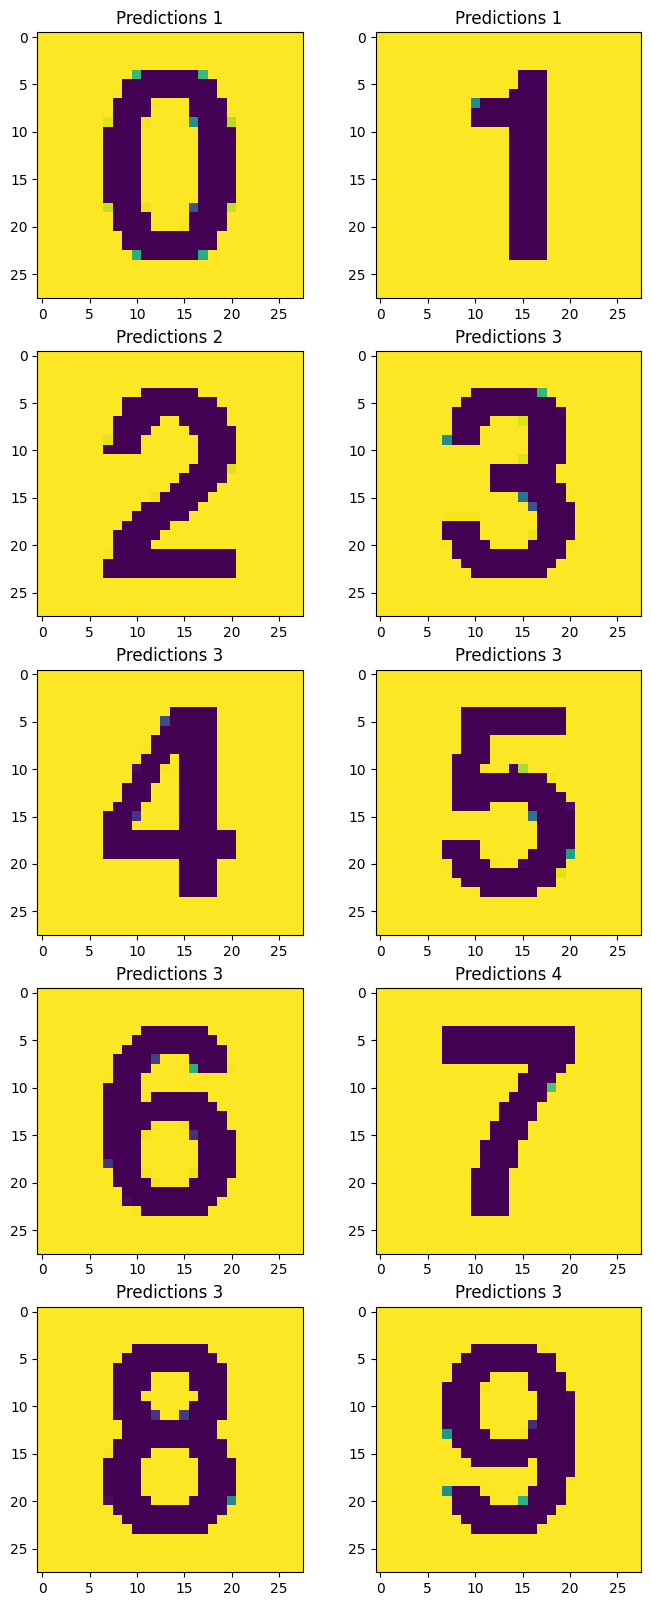

In [ ]:
game(model_6)

##Model_7 (model_1 (epoch=8) , augmented data)

Take function show augmentad image and orijinal image on ten

In [ ]:
from tensorflow.keras.layers.experimental import preprocessing
data_augmentation = tf.keras.Sequential([
  preprocessing.RandomRotation(0.2),
  preprocessing.RandomZoom(0.2),
  preprocessing.RandomHeight(0.2),
  preprocessing.RandomWidth(0.2),
], name ="data_augmentation")

In [ ]:
tf.random.set_seed(47)

model_7 = Sequential([
  data_augmentation,
  Conv2D(10, 3, activation='relu'), 
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

# Compile the model
model_7.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_7 = model_7.fit(train_data_,
                        epochs=8,
                        steps_per_epoch=len(train_data_),
                         validation_data=test_data_,
                        validation_steps=0.25*len(test_data_),
                        callbacks = [create_tensorboard_callback(dir_name="ass2_callback", # save experiment logs here
                                                                 experiment_name="Model_7")])

Saving TensorBoard log files to: ass2_callback/Model_7/20230505-164438
Epoch 1/8
1875/1875 [==============================] - 18s 9ms/step - loss: 1.0722 - accuracy: 0.6381 - val_loss: 0.9427 - val_accuracy: 0.6942
Epoch 2/8
1875/1875 [==============================] - 16s 9ms/step - loss: 0.8984 - accuracy: 0.7032 - val_loss: 0.8495 - val_accuracy: 0.7037
Epoch 3/8
1875/1875 [==============================] - 18s 10ms/step - loss: 0.7870 - accuracy: 0.7421 - val_loss: 0.8359 - val_accuracy: 0.7120
Epoch 4/8
1875/1875 [==============================] - 17s 9ms/step - loss: 0.7196 - accuracy: 0.7649 - val_loss: 0.7267 - val_accuracy: 0.7500
Epoch 5/8
1875/1875 [==============================] - 17s 9ms/step - loss: 0.6703 - accuracy: 0.7801 - val_loss: 0.7738 - val_accuracy: 0.7413
Epoch 6/8
1875/1875 [==============================] - 18s 10ms/step - loss: 0.6342 - accuracy: 0.7937 - val_loss: 0.7397 - val_accuracy: 0.7397
Epoch 7/8
1875/1875 [==============================] - 16s 8ms/

In [ ]:
model_7.evaluate(test_data_)

313/313 [==============================] - 2s 5ms/step - loss: 0.5773 - accuracy: 0.8159


[0.577282190322876, 0.8159000277519226]

In [ ]:
model_7.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_9 (Sequential)   (None, None, None, None)  0         
                                                                 
 conv2d_28 (Conv2D)          (None, None, None, 10)    100       
                                                                 
 conv2d_29 (Conv2D)          (None, None, None, 10)    910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, None, None, 10)   0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, None, None, 10)    910       
                                                                 
 conv2d_31 (Conv2D)          (None, None, None, 10)    910       
                                                     

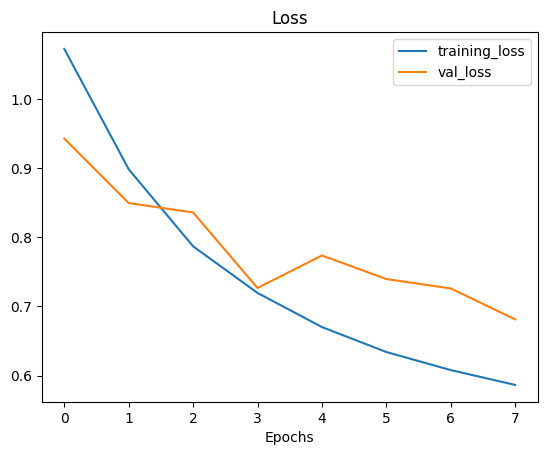

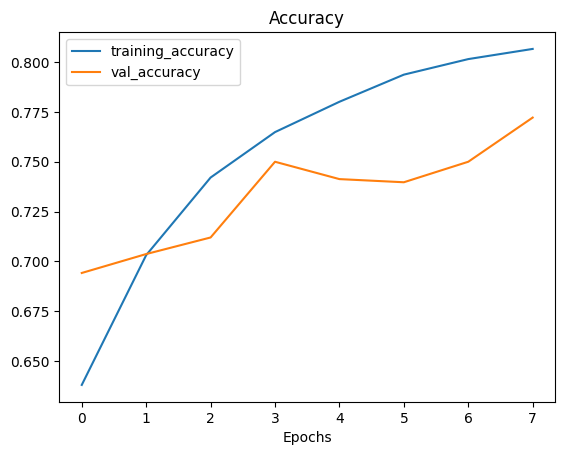

In [ ]:
plot_loss_curves(history_7)

The success of the model trained after data augmentation was quite low compared to other models. This may be due to the data set we used. For example, while 3 and 8 are similar to each other, the model may be wrong with some augmentation processes.

In [ ]:
y_probs_7 = model_7.predict(test_data_)

313/313 [==============================] - 1s 3ms/step


In [ ]:
y_preds_7 = y_probs_7.argmax(axis=1)

In [ ]:
y_test_argmax_7 = tf.math.argmax(y_test,axis=1)

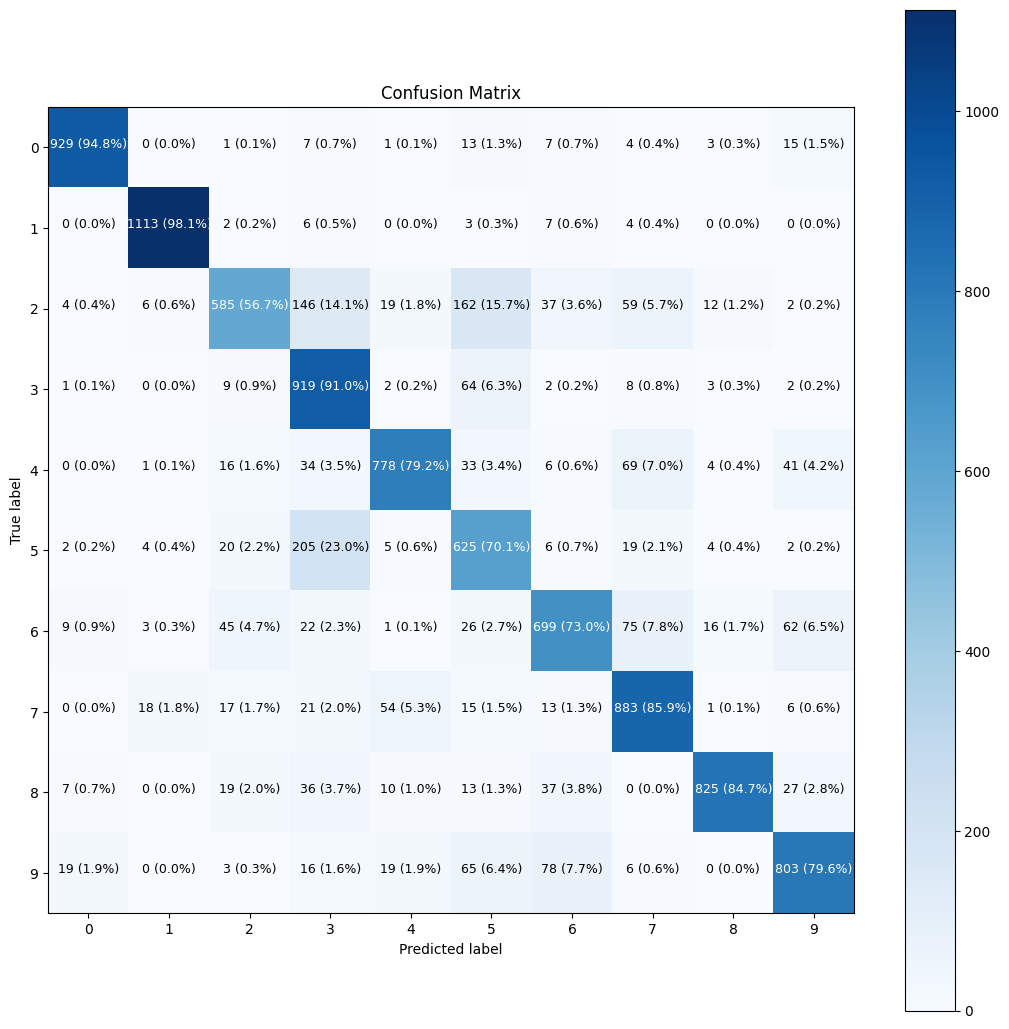

In [ ]:
make_confusion_matrix(y_true=y_test_argmax_7, 
                      y_pred=y_preds_7,
                      classes=[i for i in range(10)],
                      figsize=(13, 13),
                      text_size=9)

In [ ]:
print(classification_report(y_test_argmax_7, y_preds_7))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       980
           1       0.97      0.98      0.98      1135
           2       0.82      0.57      0.67      1032
           3       0.65      0.91      0.76      1010
           4       0.88      0.79      0.83       982
           5       0.61      0.70      0.65       892
           6       0.78      0.73      0.76       958
           7       0.78      0.86      0.82      1028
           8       0.95      0.85      0.90       974
           9       0.84      0.80      0.82      1009

    accuracy                           0.82     10000
   macro avg       0.82      0.81      0.81     10000
weighted avg       0.83      0.82      0.82     10000



###Game Part


1/1 [==============================] - 0s 45ms/step


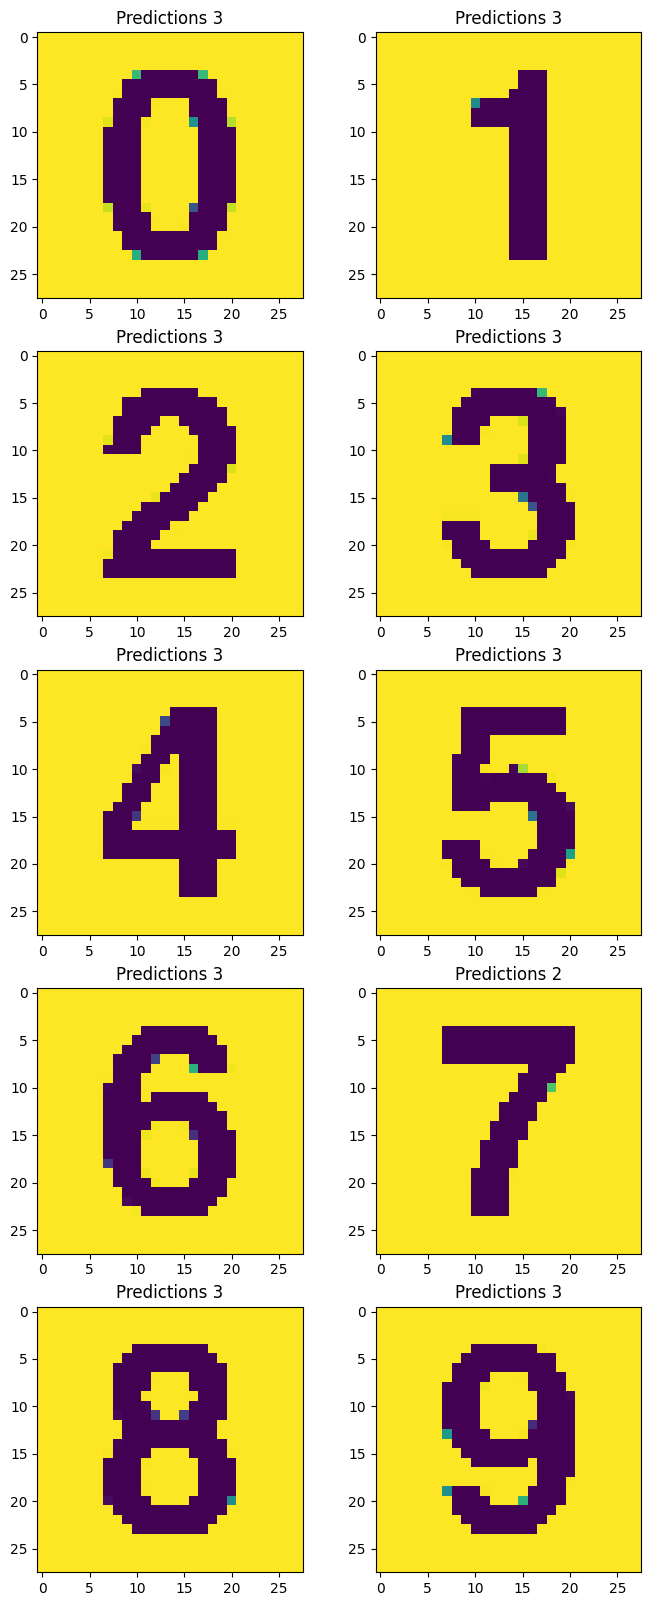

In [ ]:
game(model_7)

##Model_8( Transfer Learning using EfficientNetB0 with Imagenet weights )

In [ ]:
train_data_[0][1].shape

(32, 10)

In [ ]:
# Create base model
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

#Freeze the base model (Feature Extraction)
base_model.trainable = False

#Create inputs into the base model
inputs = tf.keras.layers.Input(shape=(28, 28, 1), name="input_layer")

# Resize input 
x = tf.keras.layers.experimental.preprocessing.Resizing(56,56)(inputs)

# Pass the inputs to the base_model 
x = base_model(x)

# Average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

# Create the output activation layer
outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

#Combine the inputs with the outputs into a model
model_8 = tf.keras.Model(inputs, outputs)


model_8.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history_8 = model_8.fit(train_data_,
                                 epochs=8,
                                 steps_per_epoch=len(train_data_),
                                 validation_data=test_data_,
                                 # Go through less of the validation data so epochs are faster (we want faster experiments!)
                                 validation_steps=int(0.25 * len(test_data_)), 
                                 # Track our model's training logs for visualization later
                                 callbacks=[create_tensorboard_callback("ass2_callback", "Model_8")])

Shape after base_model: (None, 1, 1, 1280)
After GlobalAveragePooling2D(): (None, 1280)
Saving TensorBoard log files to: ass2_callback/Model_8/20230505-174552
Epoch 1/8
1875/1875 [==============================] - 81s 19ms/step - loss: 0.5407 - accuracy: 0.8515 - val_loss: 0.2981 - val_accuracy: 0.9135
Epoch 2/8
1875/1875 [==============================] - 22s 12ms/step - loss: 0.2926 - accuracy: 0.9124 - val_loss: 0.2308 - val_accuracy: 0.9323
Epoch 3/8
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2408 - accuracy: 0.9283 - val_loss: 0.2092 - val_accuracy: 0.9359
Epoch 4/8
1875/1875 [==============================] - 23s 13ms/step - loss: 0.2170 - accuracy: 0.9339 - val_loss: 0.1922 - val_accuracy: 0.9391
Epoch 5/8
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1995 - accuracy: 0.9392 - val_loss: 0.1809 - val_accuracy: 0.9507
Epoch 6/8
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1882 - accuracy: 0.9417 - val_loss: 0

In [ ]:
model_8.summary()

Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 28, 28, 1)]       0         
                                                                 
 resizing_14 (Resizing)      (None, 56, 56, 1)         0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling_laye  (None, 1280)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
___________________________________________

In [ ]:
# Check layers in our base model
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name) 

0 input_32
1 rescaling_54
2 normalization_27
3 rescaling_55
4 stem_conv_pad
5 stem_conv
6 stem_bn
7 stem_activation
8 block1a_dwconv
9 block1a_bn
10 block1a_activation
11 block1a_se_squeeze
12 block1a_se_reshape
13 block1a_se_reduce
14 block1a_se_expand
15 block1a_se_excite
16 block1a_project_conv
17 block1a_project_bn
18 block2a_expand_conv
19 block2a_expand_bn
20 block2a_expand_activation
21 block2a_dwconv_pad
22 block2a_dwconv
23 block2a_bn
24 block2a_activation
25 block2a_se_squeeze
26 block2a_se_reshape
27 block2a_se_reduce
28 block2a_se_expand
29 block2a_se_excite
30 block2a_project_conv
31 block2a_project_bn
32 block2b_expand_conv
33 block2b_expand_bn
34 block2b_expand_activation
35 block2b_dwconv
36 block2b_bn
37 block2b_activation
38 block2b_se_squeeze
39 block2b_se_reshape
40 block2b_se_reduce
41 block2b_se_expand
42 block2b_se_excite
43 block2b_project_conv
44 block2b_project_bn
45 block2b_drop
46 block2b_add
47 block3a_expand_conv
48 block3a_expand_bn
49 block3a_expand_acti

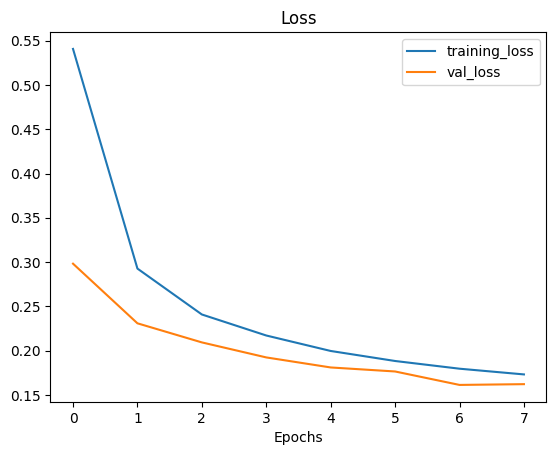

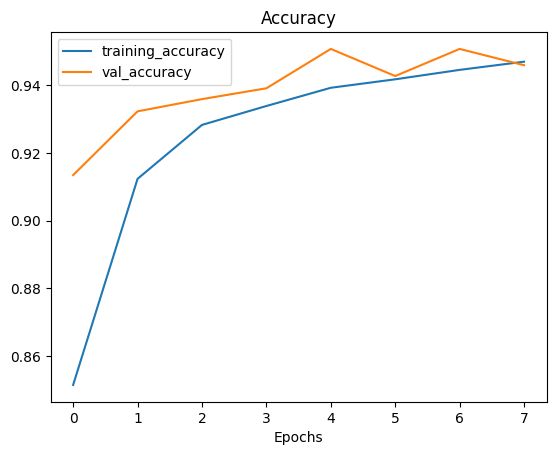

In [ ]:
plot_loss_curves(history_8)

The model prepared using transfer learning seems to give the best results. The model created by changing only the last layer of the EfficientNetB0 pre-trained model trained with the Imagenet dataset gave very successful results.

In [ ]:
y_probs_8 = model_8.predict(test_data_)

313/313 [==============================] - 6s 12ms/step


In [ ]:
y_preds_8 = y_probs_8.argmax(axis=1)

In [ ]:
y_test_argmax_8 = tf.math.argmax(y_test,axis=1)

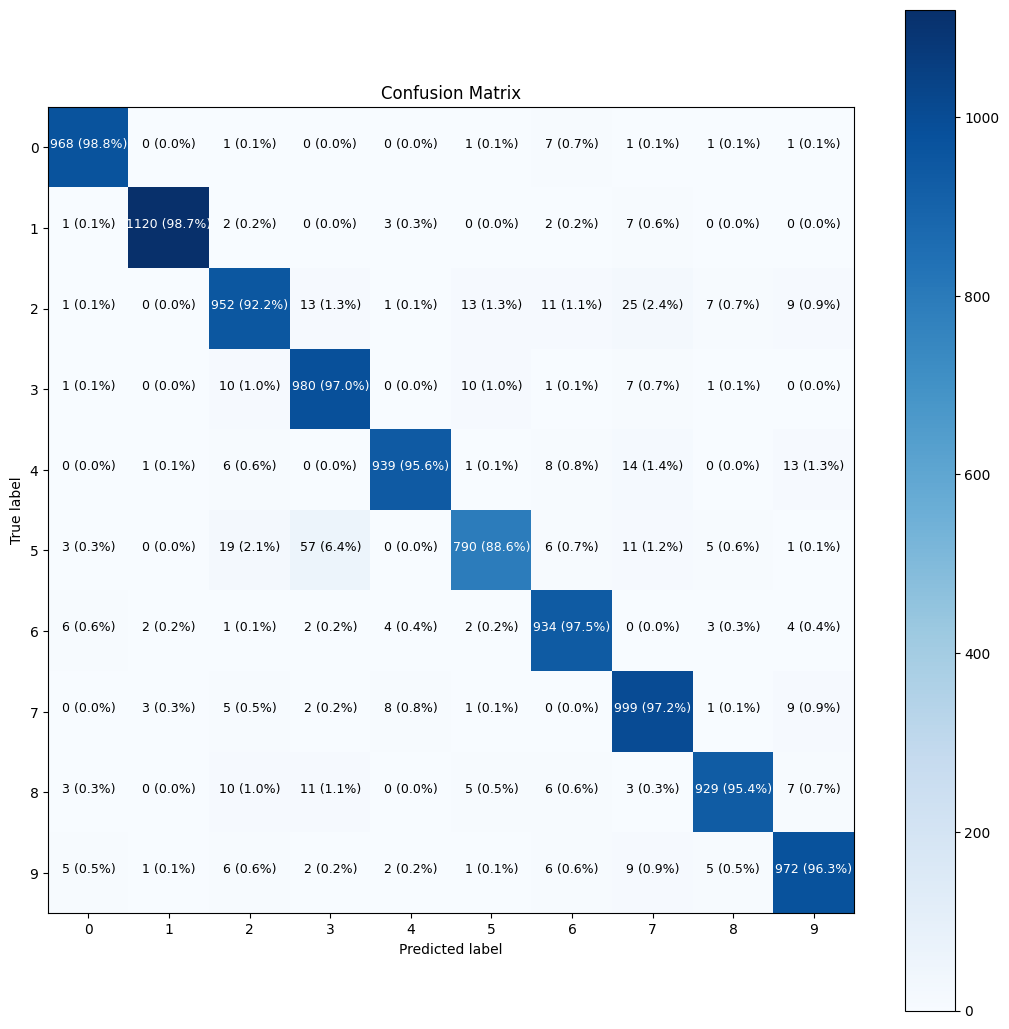

In [ ]:
make_confusion_matrix(y_true=y_test_argmax_8, 
                      y_pred=y_preds_8,
                      classes=[i for i in range(10)],
                      figsize=(13, 13),
                      text_size=9)

In [ ]:
print(classification_report(y_test_argmax_8, y_preds_8))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.94      0.92      0.93      1032
           3       0.92      0.97      0.94      1010
           4       0.98      0.96      0.97       982
           5       0.96      0.89      0.92       892
           6       0.95      0.97      0.96       958
           7       0.93      0.97      0.95      1028
           8       0.98      0.95      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



###Game Part

1/1 [==============================] - 0s 25ms/step


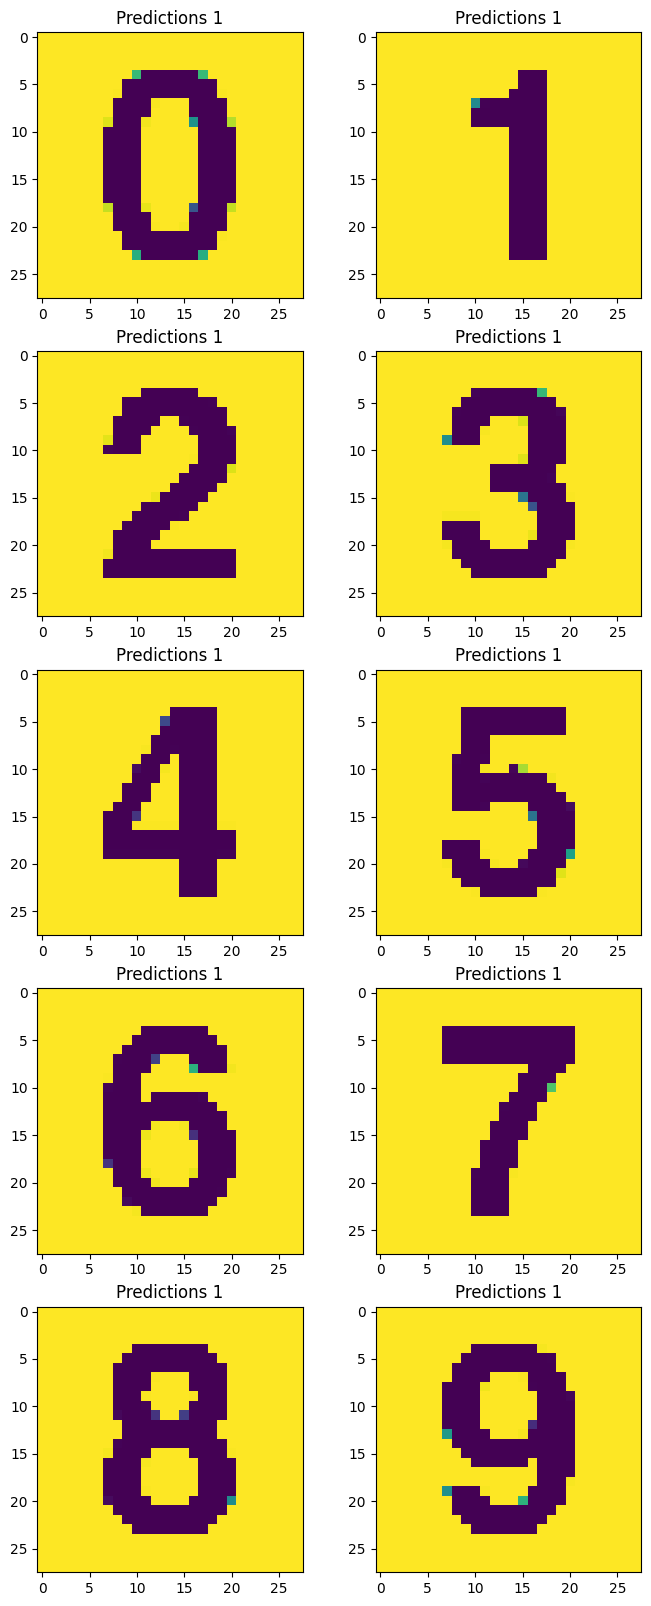

In [ ]:
game(model_8)

#Compare All Results

In [ ]:
# Upload TensorBoard dev records
!tensorboard dev upload --logdir ./ass2_callback/ \
  --name "Compare CNN Models" \
  --description "Effect of hyperparameters on the CNN model" \
  --one_shot

2023-05-05 18:43:51.656091: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT

New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/P7gbikD3TwuLevCJrQUQAg/

[2023-05-05T18:43:53] Started scanning logdir.
[2023-05-05T18:44:01] Total uploaded: 456 scalars, 0 tensors, 8 binary objects (1.5 MB)
[2023-05-05T18:44:01] Done scanning logdir.


Done. View your TensorBoard at https://tensorboard.dev/experiment/P7gbikD3TwuLevCJrQUQAg/


🛠 You can better examine the model results by following the link.


https://tensorboard.dev/experiment/P7gbikD3TwuLevCJrQUQAg/

In [ ]:
# Check out experiments
!tensorboard dev list

2023-05-05 18:44:28.583653: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
https://tensorboard.dev/experiment/P7gbikD3TwuLevCJrQUQAg/
	Name                 Compare CNN Models
	Description          Effect of hyperparameters on the CNN model
	Id                   P7gbikD3TwuLevCJrQUQAg
	Created              2023-05-05 18:43:53 (37 seconds ago)
	Updated              2023-05-05 18:44:01 (29 seconds ago)
	Runs                 16
	Tags                 5
	Scalars              456
	Tensor bytes         0
	Binary object bytes  1587392
Total: 1 experiment(s)
